In [347]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import seaborn as sns
import sklearn


delim_size = 50
print("=" * delim_size)

url = "./nasa.csv"
data_raw = pd.read_csv(url)

# Обзор данных

In [348]:
data_raw.shape


(4687, 40)

In [349]:
data_raw.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [350]:
data_raw.head()

Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
0           3703080  3703080                21.6            0.127220   
1           3723955  3723955                21.3            0.146068   
2           2446862  2446862                20.3            0.231502   
3           3092506  3092506                27.4            0.008801   
4           3514799  3514799                21.6            0.127220   

   Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
0            0.284472         127.219879         284.472297   
1            0.326618         146.067964         326.617897   
2            0.517654         231.502122         517.654482   
3            0.019681           8.801465          19.680675   
4            0.284472         127.219879         284.472297   

   Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  ...  \
0               0.079051               0.176763            417.388066  ...   
1               0.090762               0.202951            479.225620  ...   
2               0.143849               0.321655            759.521423  ...   
3               0.005469               0.012229             28.876199  ...   
4               0.079051               0.176763            417.388066  ...   

   Asc Node Longitude Orbital Period  Perihelion Distance  Perihelion Arg  \
0          314.373913     609.599786             0.808259       57.257470   
1          136.717242     425.869294             0.718200      313.091975   
2          259.475979     643.580228             0.950791      248.415038   
3           57.173266     514.082140             0.983902       18.707701   
4           84.629307     495.597821             0.967687      158.263596   

   Aphelion Dist  Perihelion Time  Mean Anomaly  Mean Motion  Equinox  \
0       2.005764     2.458162e+06    264.837533     0.590551    J2000   
1       1.497352     2.457795e+06    173.741112     0.845330    J2000   
2       1.966857     2.458120e+06    292.893654     0.559371    J2000   
3       1.527904     2.457902e+06     68.741007     0.700277    J2000   
4       1.483543     2.457814e+06    135.142133     0.726395    J2000   

   Hazardous  
0       True  
1      False  
2       True  
3      False  
4       True  

[5 rows x 40 columns]

In [351]:
data_raw.tail()

Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
4682           3759007  3759007              23.900            0.044112   
4683           3759295  3759295              28.200            0.006089   
4684           3759714  3759714              22.700            0.076658   
4685           3759720  3759720              21.800            0.116026   
4686           3772978  3772978              19.109            0.400641   

      Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
4682            0.098637          44.111820          98.637028   
4683            0.013616           6.089126          13.615700   
4684            0.171412          76.657557         171.411509   
4685            0.259442         116.025908         259.441818   
4686            0.895860         400.640618         895.859655   

      Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  ...  \
4682               0.027410               0.061290            144.723824  ...   
4683               0.003784               0.008460             19.977449  ...   
4684               0.047633               0.106510            251.501180  ...   
4685               0.072095               0.161210            380.662441  ...   
4686               0.248946               0.556661           1314.437764  ...   

      Asc Node Longitude Orbital Period  Perihelion Distance  Perihelion Arg  \
4682          164.183305     457.179984             0.741558      276.395697   
4683          345.225230     407.185767             0.996434       42.111064   
4684           37.026468     690.054279             0.965760      274.692712   
4685          163.802910     662.048343             1.185467      180.346090   
4686          187.642183     653.679098             0.876110      222.436688   

      Aphelion Dist  Perihelion Time  Mean Anomaly  Mean Motion  Equinox  \
4682       1.581299     2.457708e+06    304.306025     0.787436    J2000   
4683       1.153835     2.458088e+06    282.978786     0.884117    J2000   
4684       2.090708     2.458300e+06    203.501147     0.521698    J2000   
4685       1.787733     2.458288e+06    203.524965     0.543767    J2000   
4686       2.071980     2.458319e+06    184.820424     0.550729    J2000   

      Hazardous  
4682      False  
4683      False  
4684      False  
4685      False  
4686      False  

[5 rows x 40 columns]

Мы видим, что столбцы (признаки) имеют имена

- Neo Reference ID, Name - ID астероида
- Absolute Magnitude - яркость небесного объекта, видимого на стандартном расстоянии 10 парсеков.
- Est Dia in KM(min), Est Dia in KM(max)... - ожидаемый минимальный/максимальный диаметр астероида. Сразу исключим избыточные данные и оставим только значения в метрах
- Close Approach Date - дата максимально близкого прохода к Земле.
- Epoch Date Close Approach - это момент времени, используемый в качестве ориентира для некоторой изменяющейся во времени астрономической величины.
- Relative Velocity km per sec / Relative Velocity km per h - относительная скорость астероида в километрах в секунду / километрах в час.
- Miss Dist. - достижимая величина пролета у Земли. 
- Orbiting Body - тело, вокруг которого вращается астероид.
- Orbit ID  - ID орбиты.
- Orbit Determination Date - дата определения орбиты.
- Orbit Uncertainity - неопределенность орбиты.
- Minimum Orbit Intersection - это мера, используемая в астрономии для оценки потенциальных сближений и рисков столкновения между астрономическими объектами. Он определяется как расстояние между ближайшими точками соприкасающихся орбит двух тел.
- Jupiter Tisserand Invariant - параметр Тиссерана (или инвариант Тиссерана) - это значение, вычисленное по нескольким параметрам орбиты (большая полуось, эксцентриситет орбиты и наклон) относительно небольшого объекта и более существенного «возмущающего тела». Он используется для различения орбит.
- Eccentricity - эксцентриситет определяет, насколько орбита отлична от окружности. Он равен отношению расстояния от центра эллипса (c) до его фокуса большой полуоси (a).
- Semi Major Axis - большая полуось.
- Inclination - наклон.
- Asc Node Longitude - долгота.
- Orbital Period - время, за которое небесное тело совершает полный оборот вокруг внешнего центра притяжения или вокруг общего с другим небесным телом центра масс.
- Perihelion Distance - Ближайшая к Солнцу точка орбиты планеты.
- Aphelion Dist - наиболее удалённая от Солнца точка орбиты планеты или иного небесного тела Солнечной системы.
- Mean anomaly - это доля периода эллиптической орбиты, прошедшего после периапсиса орбитального тела, выраженная в виде угла, который можно использовать при расчете положения этого тела в классической задаче двух тел.
- Mean Motion - это угловая скорость, необходимая для того, чтобы тело завершило одну орбиту, предполагая постоянную скорость на круговой орбите, которая совпадает с переменной скоростью
- Equinox - это одно из двух мест на небесной сфере, в которых эклиптика пересекает небесный экватор. Эклиптика - это плоскость орбиты Земли вокруг Солнца.
- Hazardous - бинарный признак, опасность астероида.

Для простоты понимания некоторых признаков можно обратиться к рисунку:
![image.png](attachment:image.png "рис. 1")

Требуется классифицировать потенциально опасные и безопасные астероиды.

Сразу исключим избыточные данные, а так же не имеющие отношения к опасности астероида. также исключим Orbiting Body и Equinox, т.к значение этих признаков эдинственно.
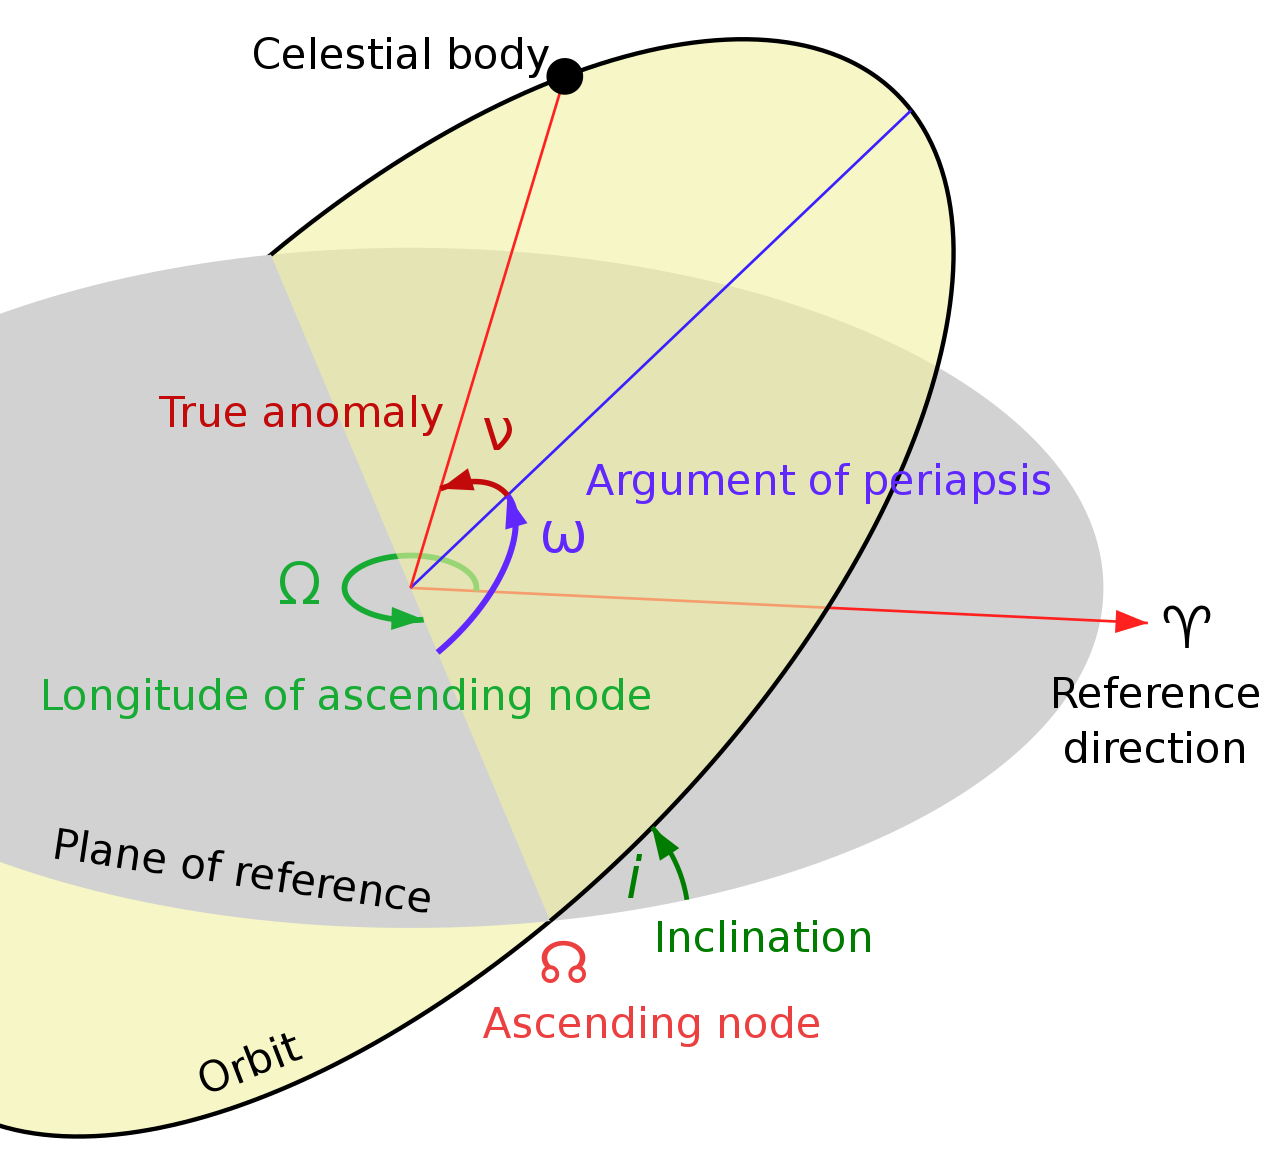

In [352]:
data_raw['Equinox'].value_counts()

J2000    4687
Name: Equinox, dtype: int64

In [353]:
data_raw['Orbiting Body'].value_counts()

Earth    4687
Name: Orbiting Body, dtype: int64

In [354]:
cols_to_drop = [ 'Neo Reference ID', 'Name', 'Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in Miles(min)',\
                'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Orbit ID',\
                'Orbit Determination Date', 'Close Approach Date', 'Miles per hour', 'Relative Velocity km per sec',\
                'Orbiting Body', 'Equinox', 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)',\
                'Epoch Date Close Approach' ]
data_raw = data_raw.drop(cols_to_drop, axis=1)

In [355]:
data_raw['Hazardous'] = data_raw['Hazardous'].astype('int64')
len(data_raw.columns)

21

# Визуализация и описательная статистика

In [356]:
data_raw.isna().sum()

Absolute Magnitude             0
Est Dia in M(min)              0
Est Dia in M(max)              0
Relative Velocity km per hr    0
Miss Dist.(Astronomical)       0
Orbit Uncertainity             0
Minimum Orbit Intersection     0
Jupiter Tisserand Invariant    0
Epoch Osculation               0
Eccentricity                   0
Semi Major Axis                0
Inclination                    0
Asc Node Longitude             0
Orbital Period                 0
Perihelion Distance            0
Perihelion Arg                 0
Aphelion Dist                  0
Perihelion Time                0
Mean Anomaly                   0
Mean Motion                    0
Hazardous                      0
dtype: int64

В датасете отсутствуют пропущенные значения.

Построим матрицу корреляции.

In [357]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)
corr_mat = data_raw.corr()
corr_mat

Absolute Magnitude  Est Dia in M(min)  \
Absolute Magnitude                     1.000000          -0.613482   
Est Dia in M(min)                     -0.613482           1.000000   
Est Dia in M(max)                     -0.613482           1.000000   
Relative Velocity km per hr           -0.376853           0.242141   
Miss Dist.(Astronomical)              -0.339117           0.188027   
Orbit Uncertainity                     0.677764          -0.399488   
Minimum Orbit Intersection            -0.488235           0.257904   
Jupiter Tisserand Invariant            0.238702          -0.133582   
Epoch Osculation                      -0.116087           0.061582   
Eccentricity                          -0.361359           0.216623   
Semi Major Axis                       -0.212437           0.121224   
Inclination                           -0.459632           0.259450   
Asc Node Longitude                    -0.011470           0.036558   
Orbital Period                        -0.206774           0.118314   
Perihelion Distance                    0.086966          -0.071866   
Perihelion Arg                         0.031784          -0.019577   
Aphelion Dist                         -0.256169           0.151836   
Perihelion Time                       -0.115855           0.062167   
Mean Anomaly                          -0.049401           0.031455   
Mean Motion                            0.195652          -0.104350   
Hazardous                             -0.325522           0.132424   

                             Est Dia in M(max)  Relative Velocity km per hr  \
Absolute Magnitude                   -0.613482                    -0.376853   
Est Dia in M(min)                     1.000000                     0.242141   
Est Dia in M(max)                     1.000000                     0.242141   
Relative Velocity km per hr           0.242141                     1.000000   
Miss Dist.(Astronomical)              0.188027                     0.351694   
Orbit Uncertainity                   -0.399488                    -0.202234   
Minimum Orbit Intersection            0.257904                     0.076306   
Jupiter Tisserand Invariant          -0.133582                    -0.052294   
Epoch Osculation                      0.061582                     0.020194   
Eccentricity                          0.216623                     0.495053   
Semi Major Axis                       0.121224                     0.014351   
Inclination                           0.259450                     0.514657   
Asc Node Longitude                    0.036558                    -0.021301   
Orbital Period                        0.118314                     0.017961   
Perihelion Distance                  -0.071866                    -0.506978   
Perihelion Arg                       -0.019577                    -0.002913   
Aphelion Dist                         0.151836                     0.144782   
Perihelion Time                       0.062167                     0.020006   
Mean Anomaly                          0.031455                     0.017685   
Mean Motion                          -0.104350                     0.022452   
Hazardous                             0.132424                     0.191970   

                             Miss Dist.(Astronomical)  Orbit Uncertainity  \
Absolute Magnitude                          -0.339117            0.677764   
Est Dia in M(min)                            0.188027           -0.399488   
Est Dia in M(max)                            0.188027           -0.399488   
Relative Velocity km per hr                  0.351694           -0.202234   
Miss Dist.(Astronomical)                     1.000000           -0.326158   
Orbit Uncertainity                          -0.326158            1.000000   
Minimum Orbit Intersection                   0.351981           -0.267524   
Jupiter Tisserand Invariant                  0.093969           -0.008992   
Epoch Osculation                             0.193944   

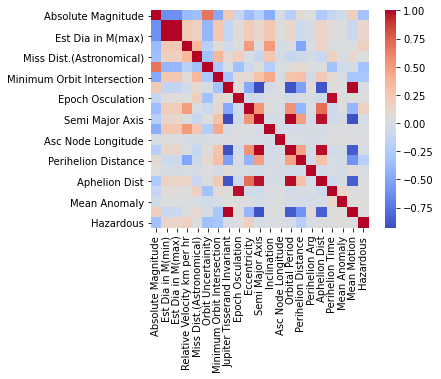

In [358]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')

Проанализируем корреляцию признака Hazardous с остальными.

In [359]:
corr_mat['Hazardous']

Absolute Magnitude            -0.325522
Est Dia in M(min)              0.132424
Est Dia in M(max)              0.132424
Relative Velocity km per hr    0.191970
Miss Dist.(Astronomical)       0.032407
Orbit Uncertainity            -0.328721
Minimum Orbit Intersection    -0.288949
Jupiter Tisserand Invariant   -0.003404
Epoch Osculation               0.040940
Eccentricity                   0.183269
Semi Major Axis               -0.010770
Inclination                    0.009607
Asc Node Longitude             0.017536
Orbital Period                -0.011168
Perihelion Distance           -0.207027
Perihelion Arg                -0.003865
Aphelion Dist                  0.040800
Perihelion Time                0.038113
Mean Anomaly                   0.054164
Mean Motion                    0.013028
Hazardous                      1.000000
Name: Hazardous, dtype: float64

In [360]:
corr_mat['Hazardous'] > 0.11

Absolute Magnitude             False
Est Dia in M(min)               True
Est Dia in M(max)               True
Relative Velocity km per hr     True
Miss Dist.(Astronomical)       False
Orbit Uncertainity             False
Minimum Orbit Intersection     False
Jupiter Tisserand Invariant    False
Epoch Osculation               False
Eccentricity                    True
Semi Major Axis                False
Inclination                    False
Asc Node Longitude             False
Orbital Period                 False
Perihelion Distance            False
Perihelion Arg                 False
Aphelion Dist                  False
Perihelion Time                False
Mean Anomaly                   False
Mean Motion                    False
Hazardous                       True
Name: Hazardous, dtype: bool

Довольно очевидно, что скорость и размеры прямо влияют на опасность астероида, однако она определяется не только этими параметрами. 

In [361]:
corr_mat['Hazardous'] < -0.11

Absolute Magnitude              True
Est Dia in M(min)              False
Est Dia in M(max)              False
Relative Velocity km per hr    False
Miss Dist.(Astronomical)       False
Orbit Uncertainity              True
Minimum Orbit Intersection      True
Jupiter Tisserand Invariant    False
Epoch Osculation               False
Eccentricity                   False
Semi Major Axis                False
Inclination                    False
Asc Node Longitude             False
Orbital Period                 False
Perihelion Distance             True
Perihelion Arg                 False
Aphelion Dist                  False
Perihelion Time                False
Mean Anomaly                   False
Mean Motion                    False
Hazardous                      False
Name: Hazardous, dtype: bool

По модулю наибольшие отрицательные коэффициенты корреляции превосходят положительные. Можно сделать вывод, что скорость и размер астероида хоть и влияет на его опасность, однако неопределнность орбиты астероида (Orbit Uncertainity), минимальное пересечение орбит астероида и Земли (Minimum Orbit Intersection, чем ниже значении тем объект опаснее), а также абсолютная звёздная величина (Absolute Magnitude), вляиют на показатель опасности астероида в большей степени.

No handles with labels found to put in legend.


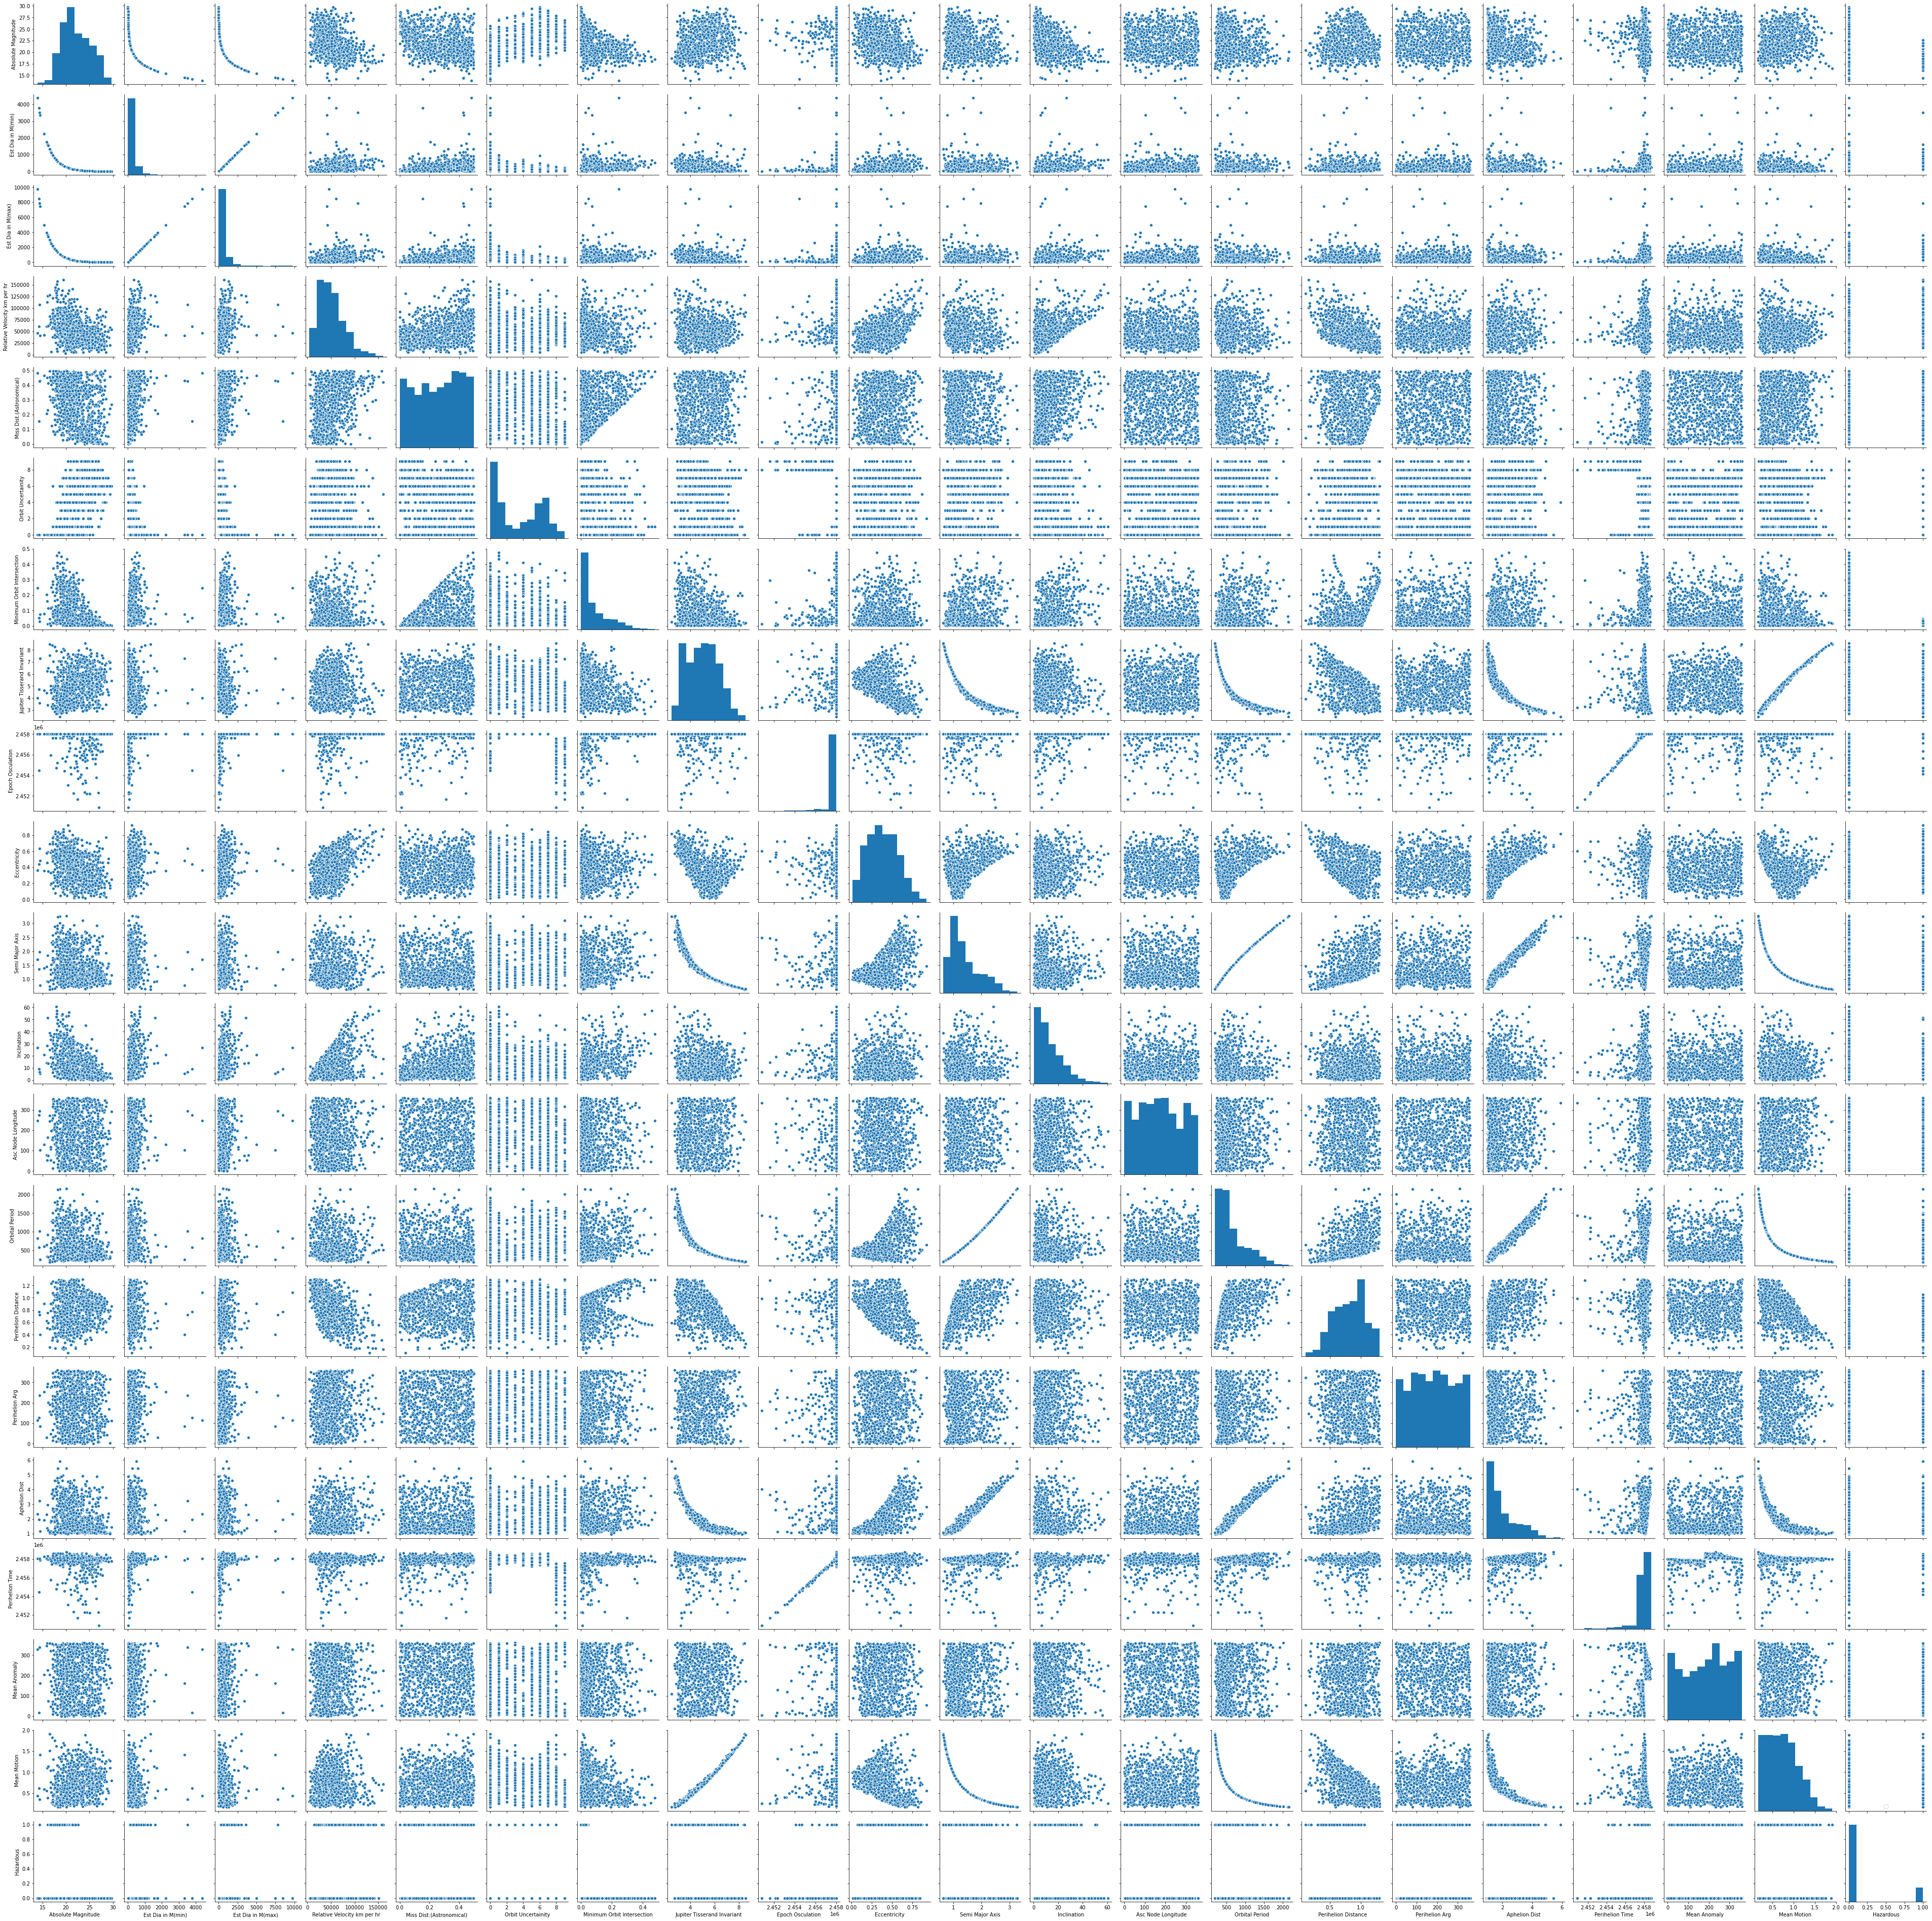

In [362]:
sns.pairplot(data_raw.iloc[random_subset])
plt.legend()

Коэффициент корреляции для признаков Est Dia in M(min), Est Dia in M(max) равен 1, значит один из признаков можно исключить. Исключим Est Dia in M(min).

In [363]:
data_raw.drop(['Est Dia in M(min)'], axis=1, inplace=True)

In [364]:
data_raw.describe()

Absolute Magnitude  Est Dia in M(max)  Relative Velocity km per hr  \
count         4687.000000        4687.000000                  4687.000000   
mean            22.267865         457.508906                 50294.919829   
std              2.890972         826.391249                 26255.601377   
min             11.160000           2.259644                  1207.814804   
25%             20.100000          74.823838                 30358.313370   
50%             21.900000         247.765013                 46504.401181   
75%             24.500000         567.596853                 65079.535405   
max             32.100000       34836.938254                160681.487851   

       Miss Dist.(Astronomical)  Orbit Uncertainity  \
count               4687.000000         4687.000000   
mean                   0.256778            3.516962   
std                    0.145798            3.078307   
min                    0.000178            0.000000   
25%                    0.133420            0.000000   
50%                    0.265029            3.000000   
75%                    0.384154            6.000000   
max                    0.499884            9.000000   

       Minimum Orbit Intersection  Jupiter Tisserand Invariant  \
count                 4687.000000                  4687.000000   
mean                     0.082320                     5.056111   
std                      0.090300                     1.237818   
min                      0.000002                     2.196000   
25%                      0.014585                     4.049500   
50%                      0.047365                     5.071000   
75%                      0.123593                     6.019000   
max                      0.477891                     9.025000   

       Epoch Osculation  Eccentricity  Semi Major Axis  Inclination  \
count      4.687000e+03   4687.000000      4687.000000  4687.000000   
mean       2.457724e+06      0.382569         1.400264    13.373844   
std        9.202975e+02      0.180444         0.524154    10.936227   
min        2.450164e+06      0.007522         0.615920     0.014513   
25%        2.458000e+06      0.240858         1.000635     4.962341   
50%        2.458000e+06      0.372450         1.240981    10.311836   
75%        2.458000e+06      0.512411         1.678364    19.511681   
max        2.458020e+06      0.960261         5.072008    75.406667   

       Asc Node Longitude  Orbital Period  Perihelion Distance  \
count         4687.000000     4687.000000          4687.000000   
mean           172.157275      635.582076             0.813383   
std            103.276777      370.954727             0.242059   
min              0.001941      176.557161             0.080744   
25%             83.081208      365.605031             0.630834   
50%            172.625393      504.947292             0.833153   
75%            255.026909      794.195972             0.997227   
max            359.905890     4172.231343             1.299832   

       Perihelion Arg  Aphelion Dist  Perihelion Time  Mean Anomaly  \
count     4687.000000    4687.000000     4.687000e+03   4687.000000   
mean       183.932151       1.987144     2.457728e+06    181.167927   
std        103.513035       0.951519     9.442264e+02    107.501623   
min          0.006918       0.803765     2.450100e+06      0.003191   
25%         95.625916       1.266059     2.457815e+06     87.006918   
50%        189.761641       1.618195     2.457973e+06    185.718889   
75%        271.777557       2.451171     2.458108e+06    276.531946   
max        359.993098       8.983852     2.458839e+06    359.917991   

       Mean Motion    Hazardous  
count  4687.000000  4687.000000  
mean      0.738242     0.161084  
std       0.342627     0.367647  
min       0.086285     0.000000  
25%       0.453289     0.000000  
50%       0.712946     0.000000  
75%       0.984669     0.000000  
max       2.039000     1.000000

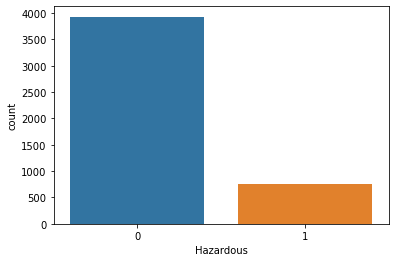

In [365]:
sns.countplot(x='Hazardous', data=data_raw)

In [366]:
data_raw['Hazardous'].value_counts()

0    3932
1     755
Name: Hazardous, dtype: int64

Классы опасных и не опасных астероидов несбалансированны.

# Обучение

## KNeighborsClassifier

In [367]:
max_neighbours = 20
X = data_raw.drop('Hazardous', axis = 1)
y = data_raw['Hazardous']
feature_names = X.columns

In [368]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test
print(N_train, N_test)

3515 1172


Training dataset error for 1 neighbours is 0.0
Testing dataset error for 1 neighbours is 0.2226962457337884
[[864 126]
 [135  47]]
Training dataset error for 2 neighbours is 0.10810810810810811
Testing dataset error for 2 neighbours is 0.17320819112627986
[[957  33]
 [170  12]]
Training dataset error for 3 neighbours is 0.11038406827880512
Testing dataset error for 3 neighbours is 0.19539249146757678
[[918  72]
 [157  25]]
Training dataset error for 4 neighbours is 0.13001422475106686
Testing dataset error for 4 neighbours is 0.17064846416382254
[[963  27]
 [173   9]]
Training dataset error for 5 neighbours is 0.13172119487908962
Testing dataset error for 5 neighbours is 0.19027303754266212
[[928  62]
 [161  21]]
Training dataset error for 6 neighbours is 0.14623044096728308
Testing dataset error for 6 neighbours is 0.16467576791808874
[[969  21]
 [172  10]]
Training dataset error for 7 neighbours is 0.14537695590327168
Testing dataset error for 7 neighbours is 0.1766211604095563
[[947

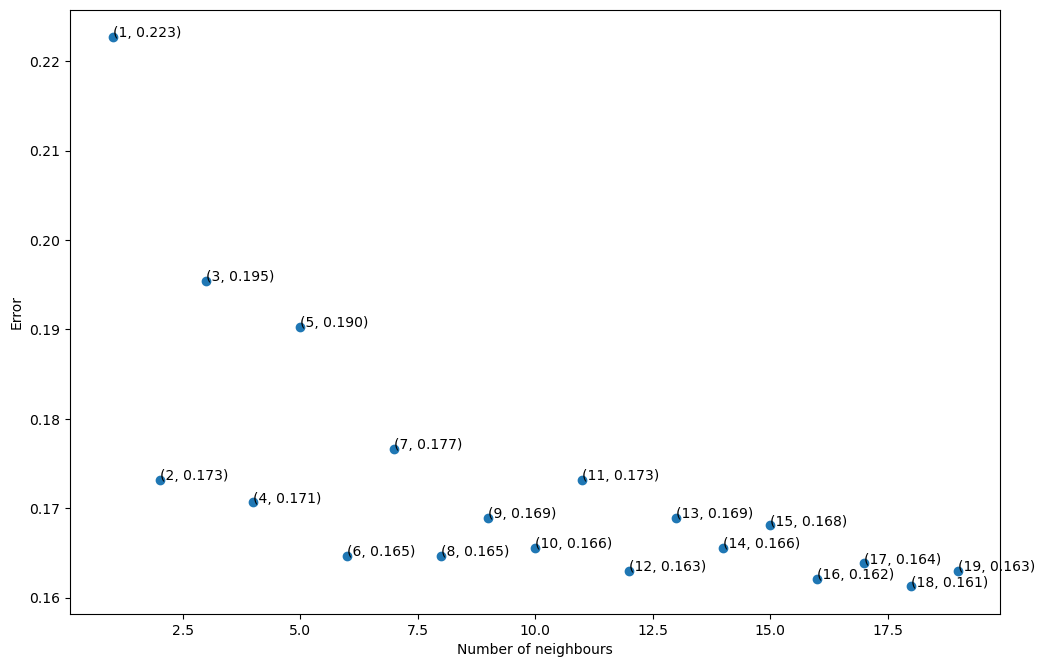

In [369]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

err_list = list()
neigbour_cnt = [x for x in range(1, max_neighbours)]
for i in neigbour_cnt:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_test_predict = knn.predict(X_test)
    y_train_predict = knn.predict(X_train)
    err_test = np.mean(y_test  != y_test_predict)
    err_train = np.mean(y_train != y_train_predict)
    print("Training dataset error for {} neighbours is {}".format(i, err_train))
    print("Testing dataset error for {} neighbours is {}".format(i, err_test))
    err_list.append(err_test)
    print(confusion_matrix(y_test, y_test_predict))
        

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.scatter(neigbour_cnt, err_list)
plt.ylabel('Error')
plt.xlabel('Number of neighbours')

for i, val in enumerate(err_list):
    label = "({}, {:.3f})".format(i + 1, val)
    plt.annotate(label, (i + 1, val))

In [370]:
min(err_list)

0.1612627986348123

## LogisticRegression

In [371]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_test_predict = logisticRegr.predict(X_test)
y_train_predict = logisticRegr.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)
print("Training dataset error for LogisticRegression is {}".format(err_train))
print("Testing dataset error for LogisticRegression is {}".format(err_test))
print(confusion_matrix(y_test, y_test_predict))


Training dataset error for LogisticRegression is 0.16813655761024182
Testing dataset error for LogisticRegression is 0.15443686006825938
[[985   5]
 [176   6]]


## Random Forest

In [372]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))

0.0 0.006825938566552901
[[985   5]
 [176   6]]


Feature ranking:
 1. feature 'Minimum Orbit Intersection' (0.449829)
 2. feature 'Absolute Magnitude' (0.153792)
 3. feature 'Est Dia in M(max)' (0.140195)
 4. feature 'Orbit Uncertainity' (0.052402)


(-1.0, 4.0)

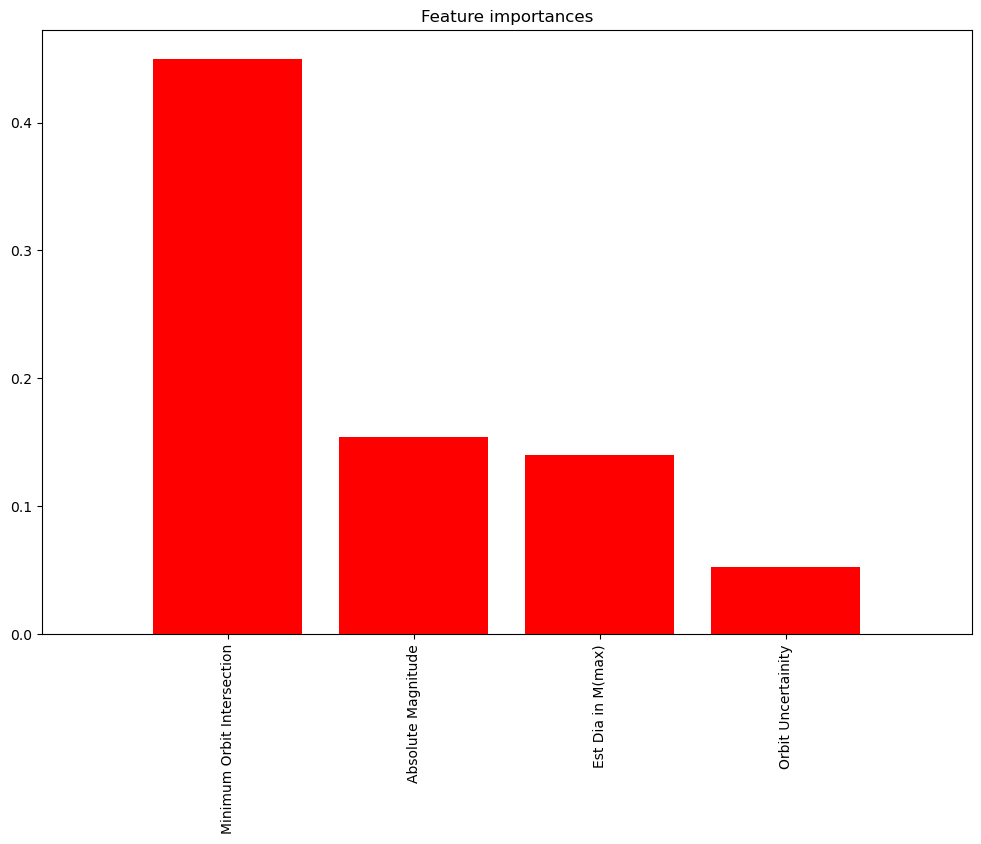

In [373]:
np.sum(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

d_first = 4
print("Feature ranking:")

for f in range(d_first):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

# Обучение на нормализованных данных

## KNeighborsClassifier

In [374]:
X = data_raw.drop('Hazardous', axis = 1)
X = (X - X.mean(axis = 0))/X.std(axis = 0)
y = data_raw['Hazardous']
feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape

N_train, N_test
print(N_train, N_test)

3515 1172


Training dataset error for 1 neighbours is 0.0
Testing dataset error for 1 neighbours is 0.08447098976109214
[[939  51]
 [ 48 134]]
Training dataset error for 2 neighbours is 0.05433854907539118
Testing dataset error for 2 neighbours is 0.1083617747440273
[[968  22]
 [105  77]]
Training dataset error for 3 neighbours is 0.04836415362731152
Testing dataset error for 3 neighbours is 0.09812286689419795
[[945  45]
 [ 70 112]]
Training dataset error for 4 neighbours is 0.06856330014224751
Testing dataset error for 4 neighbours is 0.1015358361774744
[[967  23]
 [ 96  86]]
Training dataset error for 5 neighbours is 0.061735419630156475
Testing dataset error for 5 neighbours is 0.0947098976109215
[[952  38]
 [ 73 109]]
Training dataset error for 6 neighbours is 0.07738264580369844
Testing dataset error for 6 neighbours is 0.09812286689419795
[[968  22]
 [ 93  89]]
Training dataset error for 7 neighbours is 0.07311522048364154
Testing dataset error for 7 neighbours is 0.09897610921501707
[[949

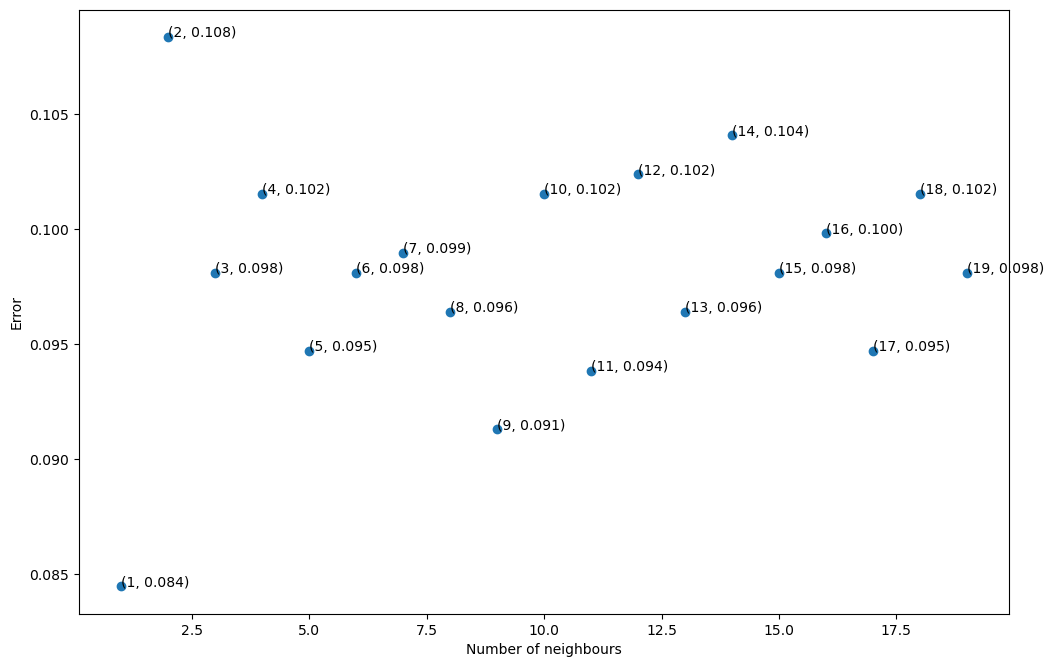

In [375]:
err_list = list()
neigbour_cnt = [x for x in range(1, max_neighbours)]
for i in neigbour_cnt:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_test_predict = knn.predict(X_test)
    y_train_predict = knn.predict(X_train)
    err_test = np.mean(y_test  != y_test_predict)
    err_train = np.mean(y_train != y_train_predict)
    print("Training dataset error for {} neighbours is {}".format(i, err_train))
    print("Testing dataset error for {} neighbours is {}".format(i, err_test))
    err_list.append(err_test)
    print(confusion_matrix(y_test, y_test_predict))
        

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.scatter(neigbour_cnt, err_list)
plt.ylabel('Error')
plt.xlabel('Number of neighbours')

for i, val in enumerate(err_list):
    label = "({}, {:.3f})".format(i + 1, val)
    plt.annotate(label, (i + 1, val))

In [376]:
min(err_list)

0.08447098976109214

## LogisticRegression

In [377]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_test_predict = logisticRegr.predict(X_test)
y_train_predict = logisticRegr.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)
print("Training dataset error for data LogisticRegression is {}".format(err_train))
print("Testing dataset error for LogisticRegression is {}".format(err_test))
print(confusion_matrix(y_test, y_test_predict))


Training dataset error for data LogisticRegression is 0.04267425320056899
Testing dataset error for LogisticRegression is 0.051194539249146756
[[963  27]
 [ 33 149]]


## RandomForest

In [378]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)
y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))

0.0 0.006825938566552901
[[985   5]
 [  3 179]]


Feature ranking:
 1. feature 'Minimum Orbit Intersection' (0.436012)
 2. feature 'Absolute Magnitude' (0.181285)
 3. feature 'Est Dia in M(max)' (0.159450)
 4. feature 'Orbit Uncertainity' (0.043767)


(-1.0, 4.0)

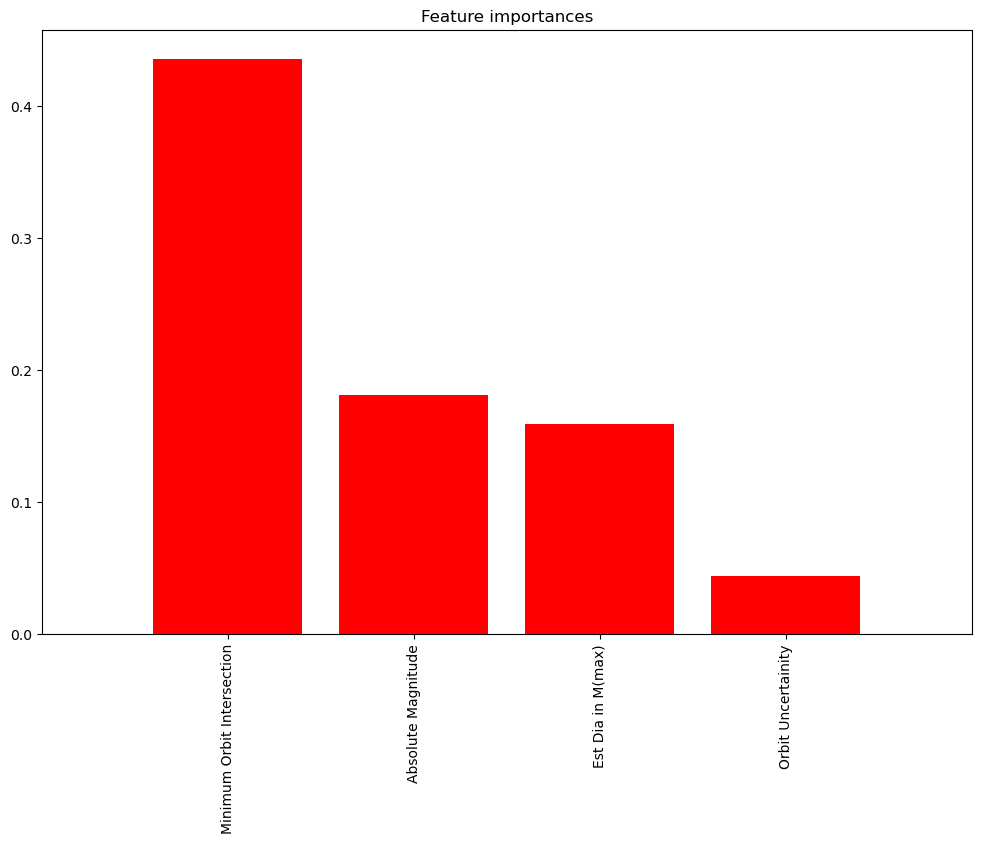

In [379]:
np.sum(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

d_first = 4
print("Feature ranking:")

for f in range(d_first):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

# Выводы
Из полученных данных видно, что после нормализации значительно уменьшается показатель ошибки на тестовой выборке. Оптимальным числом соседей для KNeighborsClassifier является 1.

# PCA + RandomForest

In [386]:
from sklearn.decomposition import PCA

max_num_comps = 19
num_comps_cnt = [x for x in range(1, max_num_comps)]
X = data_raw.drop('Hazardous', axis=1)
y = data_raw['Hazardous']

err_list = list()
for comps_cnt in num_comps_cnt:
    pca = PCA(n_components=comps_cnt)
    principalComponents = pca.fit_transform(X)

    columns = list()
    for i in range(0, comps_cnt):
        columns.append(f"principal_comp {i}")
    principalDf = pd.DataFrame(data=principalComponents, columns=columns)
    finalDf = pd.concat([principalDf, y], axis=1)

    X_ = finalDf.drop('Hazardous', axis = 1)
    y_ = finalDf['Hazardous']
    feature_names = X.columns

    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size = 0.25, random_state = 42)

    rf = ensemble.RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_test_predict = rf.predict(X_test)
    y_train_predict = rf.predict(X_train)
    err_test  = np.mean(y_test  != y_test_predict)
    err_train  = np.mean(y_train != y_train_predict)
    err_list.append(err_test)
    print("Training dataset error for data RandomForest is {}".format(err_train))
    print("Testing dataset error for RandomForest is {}".format(err_test))
    print(confusion_matrix(y_test, y_test_predict))

Training dataset error for data RandomForest is 0.0005689900426742532
Testing dataset error for RandomForest is 0.23976109215017063
[[846 144]
 [137  45]]
Training dataset error for data RandomForest is 0.0002844950213371266
Testing dataset error for RandomForest is 0.1757679180887372
[[949  41]
 [165  17]]
Training dataset error for data RandomForest is 0.0
Testing dataset error for RandomForest is 0.1766211604095563
[[939  51]
 [156  26]]
Training dataset error for data RandomForest is 0.0
Testing dataset error for RandomForest is 0.15699658703071673
[[958  32]
 [152  30]]
Training dataset error for data RandomForest is 0.0
Testing dataset error for RandomForest is 0.1552901023890785
[[956  34]
 [148  34]]
Training dataset error for data RandomForest is 0.0
Testing dataset error for RandomForest is 0.14846416382252559
[[969  21]
 [153  29]]
Training dataset error for data RandomForest is 0.0
Testing dataset error for RandomForest is 0.14505119453924914
[[973  17]
 [153  29]]
Training

In [ ]:
min(err_list)

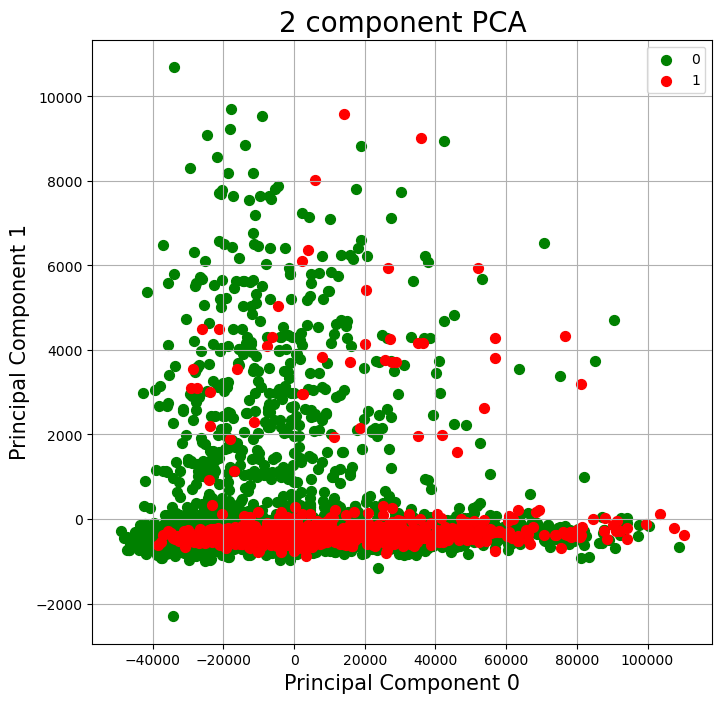

In [388]:
if num_comps <= 2:
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 0', fontsize = 15)
    ax.set_ylabel('Principal Component 1', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = [0, 1]
    colors = ['g', 'r']
    for target, color in zip(targets, colors):
        indicesToKeep = finalDf['Hazardous'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal_comp 0']
                   , finalDf.loc[indicesToKeep, 'principal_comp 1']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

In [389]:
pca.explained_variance_ratio_

array([9.96312951e-01, 2.48928711e-03, 9.27727703e-04, 1.94411333e-04,
       3.30887315e-05, 1.57843346e-05, 1.51006561e-05, 1.15092734e-05,
       1.23849404e-07, 1.30062848e-08, 2.65884703e-09, 4.87599608e-10,
       7.47415380e-11, 2.16669678e-11, 5.98726701e-12, 2.20958218e-12,
       1.08686631e-12, 1.78404285e-13])

In [390]:
ratio = float(0)
for i in pca.explained_variance_ratio_:
    ratio += i
ratio

1.0

При применении метода главных компонент мы потеряли менее 1% информации

## LDA

In [387]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
clf = LinearDiscriminantAnalysis()
X_r = clf.fit(X_train, y_train).transform(X)
y_test_predict = logisticRegr.predict(X_test)
y_train_predict = logisticRegr.predict(X_train)
err_test = np.mean(y_test  != y_test_predict)
err_train = np.mean(y_train != y_train_predict)
print("Training dataset error for neighbours is {}".format(err_train))
print("Testing dataset error for neighbours is {}".format(err_test))

Training dataset error for neighbours is 0.16301564722617354
Testing dataset error for neighbours is 0.1552901023890785
